# Adult Female Literacy Data Cleaning

### Plan of Action
Explore, clean the data, and:
* Get the five countries with highest **current** female literacy rate.<br>
* Get the five countries with lowest **current** female literacy rate. 

Here, we show the steps that we went through to create a clean dataset. <br> 
The final dataset is available in a csv file name "clean_female_literacy".<br> 
This clean dataset can be joined with other clean datasets (of variables that may influence female literacy rates), in order to perform statistical analyses and to create visualisations. 

## Data Source
* The female literacy dataset (csv) is derived from The World Bank: [here](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS). <br>
* "Adult literacy rate is the percentage of people ages 15 and above who can both read and write with understanding a short simple statement about their everyday life." - The World Bank. <br>
* "Data on literacy are compiled by the UNESCO Institute for Statistics based on national censuses and household surveys and, for countries without recent literacy data, using the Global Age-Specific Literacy Projection Model (GALP)" - The World Bank


First, we must import pandas:

In [36]:
import pandas as pd

Then, we read in our csv file into a new variable called 'df'. <br>
Please note that this csv must be saved in the same folder as this Jupyter Notebook.

In [37]:
df = pd.read_csv("unclean_literacy_data.csv")
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.812683,NaN,98.000000,NaN
1,Africa Eastern and Southern,AFE,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,60.579899,61.731258,62.319870,63.108139,64.211708,64.459534,65.028214,66.353622,66.842758,NaN
2,Afghanistan,AFG,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.600780
3,Africa Western and Central,AFW,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.810181,43.455589,44.683208,45.605259,46.376160,47.407421,50.963940,51.435429,51.639610,NaN
4,Angola,AGO,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.407211,NaN,NaN,NaN,NaN,NaN,NaN,62.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,92.586250,NaN,93.073059,93.408028,NaN,86.458633,NaN,94.533173,NaN,NaN
264,Zambia,ZMB,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,83.083443,NaN,84.300003,NaN


From the output above, we can see that:
* Each country has its own row. 
* Each country has a country code.
* Each year has its own column. 
* The first year within the table is 1960 and the last year is 2021. 
* The indicator name and indicator code is the same for every country.

In [38]:
df.shape

(266, 66)

This dataframe has 266 rows, and 66 columns.

In [39]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
2021              float64
Length: 66, dtype: object

Our dataframe is mostly comprised of float data; however, the 'Country Name', 'Country Code', 'Indicator Name', and 'Indicator Code' columns are string. 

As we only want to look at current female literacy rates (which we determined to be 2000 - 2021), we will get rid of columns 1960-1999. <br>
Furthermore, the 'Indicator Name' and 'Indicator Code' columns are irrelevant, so we will remove these from the dataset as well. 

To do this we specify the range of columns that we want to drop, assigning it to a new variable. <br>
We then drop the range by including the variable in the .drop() command.

In [40]:
to_drop = df.loc[:, "Indicator Name": "1999"] # drop all columns between (and including) the column with 'Indicator Name' and the column containing the year 1999. 

df.drop(to_drop, inplace=True, axis=1) 

df

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,97.071358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,97.812683,NaN,98.000000,NaN
1,Africa Eastern and Southern,AFE,54.137939,54.987621,54.443981,55.136002,56.427502,55.019180,53.080341,54.140690,...,60.579899,61.731258,62.319870,63.108139,64.211708,64.459534,65.028214,66.353622,66.842758,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.600780
3,Africa Western and Central,AFW,35.834911,37.099628,37.995789,38.804699,40.105389,40.364948,49.290939,39.881538,...,42.810181,43.455589,44.683208,45.605259,46.376160,47.407421,50.963940,51.435429,51.639610,NaN
4,Angola,AGO,NaN,54.194489,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53.407211,NaN,NaN,NaN,NaN,NaN,NaN,62.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.043098,...,92.586250,NaN,93.073059,93.408028,NaN,86.458633,NaN,94.533173,NaN,NaN
264,Zambia,ZMB,NaN,NaN,61.839279,NaN,NaN,NaN,NaN,51.786968,...,NaN,NaN,NaN,NaN,NaN,NaN,83.083443,NaN,84.300003,NaN


## Exploring the Unclean Dataset

In [41]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,89.000000,74.000000,61.000000,55.000000,67.000000,66.000000,72.000000,78.000000,76.000000,76.000000,...,88.000000,77.000000,97.000000,83.000000,76.000000,74.000000,117.000000,69.000000,70.000000,75.000000
mean,70.569067,72.317544,69.583280,67.031966,71.077951,69.969769,70.735596,72.063215,73.968695,76.064921,...,75.900710,77.386031,78.821047,78.855029,81.152482,77.946523,79.138289,82.313435,80.840316,80.407582
std,22.047518,22.223274,21.022224,23.031694,21.527946,22.391126,22.160890,21.639132,20.750603,20.275533,...,19.920660,19.682288,19.725274,19.632918,17.653099,18.554505,20.437578,16.182486,17.827228,22.052950
min,12.796420,9.399350,23.300140,15.188770,17.980579,15.084140,16.291130,21.027220,19.186380,36.452278,...,22.093880,24.856680,21.962250,13.933410,13.955230,34.092258,25.735161,46.490040,22.078470,18.230000
25%,52.146400,53.720067,49.190128,48.230909,50.114599,49.407536,51.573905,49.880198,53.387638,54.962645,...,60.217584,58.451271,62.319870,62.680565,69.242311,59.511634,65.028214,66.353622,66.585690,67.884998
50%,75.601082,79.069847,71.834213,72.553528,76.335159,76.031841,76.727932,79.006557,79.896317,85.155560,...,80.187595,84.670349,85.034607,86.217102,89.939510,83.571243,87.234138,88.559143,87.523029,90.459999
75%,88.645180,90.045437,88.410057,88.417007,88.785938,89.998415,89.777136,90.926441,91.646538,92.099644,...,92.457504,92.903938,93.898239,93.597187,94.245584,93.744295,95.318916,95.028816,95.098476,98.114998
max,99.760063,99.647942,99.790916,98.479218,99.599998,99.199997,99.082512,99.383942,99.997612,99.684288,...,99.958199,99.995873,99.975990,99.975769,99.978409,99.721992,99.997612,99.999947,99.800003,100.000000


When we try and use the .describe() command, it shows the count, mean etc. for each year, rather than for each country. <br>
This is because .describe() summarises information in columns, rather than rows. <br>
However, we would like to summarise the data for each country. <br>
Therefore, we will need to transpose our dataframe. 

Before we transpose the data, we need to reset our index to be "Country Names". <br>
If we don't do this step, the numeric index (i.e., 0, 1, 2 etc.) becomes the column names, rather than the country names. 

In [42]:
df_t = df.set_index("Country Name") # df_t stands for dataframe, transposed (which we will do in the step below)
df_t = df_t.transpose()
df_t

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
2000,97.071358,54.137939,NaN,35.834911,NaN,NaN,NaN,52.565948,NaN,NaN,...,NaN,86.610107,NaN,75.601082,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,54.987621,NaN,37.099628,54.194489,98.252274,NaN,53.622829,NaN,97.193413,...,NaN,NaN,NaN,76.032433,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,54.443981,NaN,37.995789,NaN,NaN,NaN,55.02673,NaN,NaN,...,NaN,NaN,NaN,76.438103,NaN,NaN,NaN,NaN,61.839279,NaN
2003,NaN,55.136002,NaN,38.804699,NaN,NaN,NaN,57.356319,NaN,NaN,...,NaN,NaN,NaN,77.010979,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,56.427502,NaN,40.105389,NaN,NaN,NaN,58.64217,NaN,NaN,...,NaN,NaN,76.199997,77.482101,NaN,NaN,35.0,NaN,NaN,NaN
2005,NaN,55.01918,NaN,40.364948,NaN,NaN,NaN,58.53611,91.474747,NaN,...,NaN,NaN,NaN,77.378349,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,53.080341,NaN,49.290939,NaN,NaN,NaN,58.411121,NaN,98.510773,...,NaN,NaN,NaN,77.958183,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,54.14069,NaN,39.881538,NaN,NaN,NaN,58.82753,NaN,NaN,...,NaN,NaN,NaN,78.288048,NaN,NaN,NaN,87.043098,51.786968,NaN
2008,NaN,54.710461,NaN,39.907219,NaN,94.681808,NaN,60.1712,NaN,NaN,...,NaN,NaN,NaN,78.7883,NaN,NaN,NaN,NaN,NaN,NaN


From the output above, we can see that the country names have become the columns, and the years have become the rows. <br>
However, we need to remove the country code for the purpose of describing the data. <br>
As it is a string value, we won't get the mean, count etc. when we use .describe()

In [43]:
df_t.drop("Country Code", inplace=True, axis = 0) # axis = 0 specifies that it is a row that we would like to drop
df_t

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,97.071358,54.137939,NaN,35.834911,NaN,NaN,NaN,52.565948,NaN,NaN,...,NaN,86.610107,NaN,75.601082,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,54.987621,NaN,37.099628,54.194489,98.252274,NaN,53.622829,NaN,97.193413,...,NaN,NaN,NaN,76.032433,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,54.443981,NaN,37.995789,NaN,NaN,NaN,55.02673,NaN,NaN,...,NaN,NaN,NaN,76.438103,NaN,NaN,NaN,NaN,61.839279,NaN
2003,NaN,55.136002,NaN,38.804699,NaN,NaN,NaN,57.356319,NaN,NaN,...,NaN,NaN,NaN,77.010979,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,56.427502,NaN,40.105389,NaN,NaN,NaN,58.64217,NaN,NaN,...,NaN,NaN,76.199997,77.482101,NaN,NaN,35.0,NaN,NaN,NaN
2005,NaN,55.01918,NaN,40.364948,NaN,NaN,NaN,58.53611,91.474747,NaN,...,NaN,NaN,NaN,77.378349,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,53.080341,NaN,49.290939,NaN,NaN,NaN,58.411121,NaN,98.510773,...,NaN,NaN,NaN,77.958183,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,54.14069,NaN,39.881538,NaN,NaN,NaN,58.82753,NaN,NaN,...,NaN,NaN,NaN,78.288048,NaN,NaN,NaN,87.043098,51.786968,NaN
2008,NaN,54.710461,NaN,39.907219,NaN,94.681808,NaN,60.1712,NaN,NaN,...,NaN,NaN,NaN,78.7883,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,55.453449,NaN,40.474682,NaN,NaN,NaN,58.68729,NaN,99.001762,...,NaN,91.379089,NaN,79.203461,NaN,NaN,NaN,91.768158,NaN,NaN


Before we can use .describe(), we should check the data type.<br>
.describe() works on numerical data. 

In [44]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2000 to 2021
Columns: 266 entries, Aruba to Zimbabwe
dtypes: object(266)
memory usage: 45.9+ KB


However, it appears that during the process of transposing, the data type has changed from a float to an object (i.e., a string value).<br>
Therefore, to use .describe(), we need to change the data type back to float. 

In [45]:
df_t = df_t.astype('float64')

Now we can use .describe():

In [46]:
df_t.describe()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
count,4.000000,21.000000,2.000000,21.000000,3.000000,6.000000,0.0,21.000000,3.000000,11.000000,...,0.0,3.000000,4.000000,21.000000,3.000000,0.0,1.0,9.000000,5.000000,3.000000
mean,97.400955,58.911419,19.809310,43.213090,56.667234,96.787126,NaN,61.467792,94.373205,98.833796,...,NaN,90.851618,83.626522,79.711299,99.204857,NaN,35.0,91.403586,71.751267,86.416496
std,0.605808,4.702088,3.947735,4.807219,4.980303,1.493198,NaN,4.824232,2.849351,0.574034,...,NaN,4.003919,5.403859,2.523731,0.120378,NaN,NaN,2.786322,14.306067,5.653401
min,96.719780,53.080341,17.017839,35.834911,53.407211,94.681808,NaN,52.565948,91.474747,97.193413,...,NaN,86.610107,76.199997,75.601082,99.069527,NaN,35.0,86.458633,51.786968,80.065659
25%,96.983463,54.987621,18.413575,39.907219,53.800850,95.802629,NaN,58.536110,92.974422,98.930447,...,NaN,88.994598,81.449997,77.482101,99.157284,NaN,35.0,91.713989,61.839279,84.174744
50%,97.442020,56.427502,19.809310,42.072731,54.194489,96.948597,NaN,60.171200,94.474098,99.001762,...,NaN,91.379089,84.953045,79.930672,99.245041,NaN,35.0,92.047890,77.746643,88.283829
75%,97.859512,63.108139,21.205045,46.376160,58.297245,98.090279,NaN,65.801949,95.822433,99.095581,...,NaN,92.972374,87.129570,81.788277,99.272522,NaN,35.0,93.073059,83.083443,89.591915
max,98.000000,66.842758,22.600780,51.639610,62.400002,98.252274,NaN,68.580452,97.170769,99.208771,...,NaN,94.565659,88.400002,83.459137,99.300003,NaN,35.0,94.533173,84.300003,90.900002


From the .describe(), it Looks like there are some countries that have **only** null values. We should probably remove these when we clean the data. <br>
Exluding the countries with **only** null values, the number (count) of literacy values per country between 2000-2021 ranges from 2 - 21 (22 being the maximum number of rows). <br>
The mean values seem to vary a lot; Afganistan's mean is 19.81%, however Samoa's mean is 99.20%.


Which five countries have the highest mean literacy rate?

In [47]:
df_t.mean().sort_values(ascending = False).head(5)

Country Name
Korea, Dem. People's Rep.    99.997612
Latvia                       99.858515
Estonia                      99.849846
Lithuania                    99.777059
Cuba                         99.769315
dtype: float64

From the output above, we can see that Korea has the greatest mean adult female literacy rate between 2000-2021.

Which five countries have the lowest mean literacy rate?

In [48]:
df_t.mean().sort_values(ascending = False).tail(5)

Country Name
United States                    NaN
St. Vincent and the Grenadines   NaN
British Virgin Islands           NaN
Virgin Islands (U.S.)            NaN
Kosovo                           NaN
dtype: float64

We can't see this because of the countries that have **only** null values.

## Exploring the Missing Data


How many nulls are in each country?

In [49]:
nulls = len(df_t)-df_t.count()
nulls # number of nulls in the each country
 

Country Name
Aruba                          18
Africa Eastern and Southern     1
Afghanistan                    20
Africa Western and Central      1
Angola                         19
                               ..
Kosovo                         22
Yemen, Rep.                    21
South Africa                   13
Zambia                         17
Zimbabwe                       19
Length: 266, dtype: int64

We can visualise where the missing data is within the dataset using a missing data histogram. <br>
We can use seaborn to do this. 

[Text(0.5, 1.0, 'Missing data heatmap'),
 Text(0.5, 23.52222222222222, 'Column name'),
 Text(50.722222222222214, 0.5, 'Row index')]

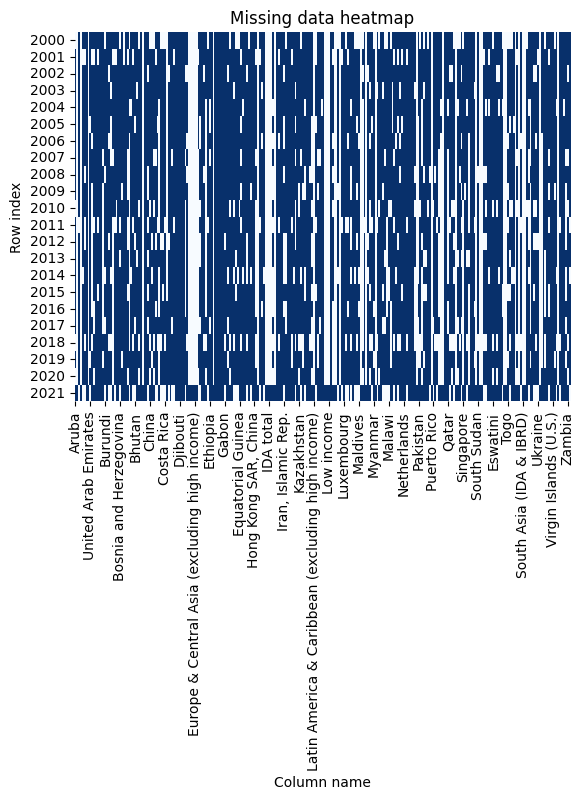

In [50]:
import seaborn as sns # need to pip install first
sns.heatmap(df_t.isnull(), cbar=False, cmap="Blues").set(title="Missing data heatmap", \
                                                            xlabel = "Column name", ylabel="Row index")

The blue shaded areas represent missing data. <br>
From the heatmap, we can see the countries that have **only** null values. <br>
We can see that missing data is present across the dataset. <br>
'Regions' (i.e., Europe and Central Asia) and 'income groups' (i.e., Low income) have less missing data. <br>
However, we might need to remove the 'regions' and 'income groups' as we want to focus on **countries** only.

Which countries have **only** null values?

In [51]:
only_nulls = df_t.isna().all() # returns either True or False (boolean)
null_countries = only_nulls[only_nulls==True] # only selects countries with missing data within all the columns
null_countries


Country Name
Andorra                           True
American Samoa                    True
Australia                         True
Austria                           True
Belgium                           True
                                  ... 
United States                     True
St. Vincent and the Grenadines    True
British Virgin Islands            True
Virgin Islands (U.S.)             True
Kosovo                            True
Length: 61, dtype: bool

The output above also tells us that there are 61 countries that don't have any data values.

## Cleaning the Data


### Plan of Action
Use the un-transposed dataframe to:
* Reduce the number of columns within the dataset. Not only does this look tidier, but it also reduces processing speed. 
* Deal with countries with **only** null values.
* Potentially remove non-countries if they appear in the top or bottom five countries. 

pandas.melt is used to "[unpivot a DataFrame from wide to long format](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)"<br>
It is used to reshape the dataframe. 

In [52]:
df_melt = df.copy() # make a copy of the un-transposed dataframe so that we can revert back to the original df if needed

Now we can use pandas.melt:
* id_vars = identifier variables. 
* var_name = name for the variable column
* value_bname = name for the value column

In [53]:
df_melt = pd.melt(df_melt, id_vars=["Country Name", "Country Code"], 
                       var_name="year", 
                       value_name="literacy rate") 

df_melt

,Country Name,Country Code,year,literacy rate
0,Aruba,ABW,2000,97.071358
1,Africa Eastern and Southern,AFE,2000,54.137939
2,Afghanistan,AFG,2000,NaN
3,Africa Western and Central,AFW,2000,35.834911
4,Angola,AGO,2000,NaN
...,...,...,...,...
5847,Kosovo,XKX,2021,NaN
5848,"Yemen, Rep.",YEM,2021,NaN
5849,South Africa,ZAF,2021,NaN
5850,Zambia,ZMB,2021,NaN


Using pandas.melt has reduced the number of columns within the dataframe. We now have 5852 rows, and 4 columns.<br>
This was done by reducing each countries' multiple year columns into a singular column. <br>
This means that each country may appear in the 'Country Name' column more than once. <br>
The corresponsing literacy rate value is also shown in another column. 

We need to remove all rows with null values now as they have no use to us.
We can do this by dropping any rows that have a null within the 'literacy rate' column.

In [54]:
df_melt = df_melt.dropna(subset=['literacy rate'])
df_melt

,Country Name,Country Code,year,literacy rate
0,Aruba,ABW,2000,97.071358
1,Africa Eastern and Southern,AFE,2000,54.137939
3,Africa Western and Central,AFW,2000,35.834911
7,Arab World,ARB,2000,52.565948
16,Burundi,BDI,2000,52.237759
...,...,...,...,...
5834,Ukraine,UKR,2021,100.000000
5840,"Venezuela, RB",VEN,2021,97.699997
5844,Vanuatu,VUT,2021,88.400002
5846,Samoa,WSM,2021,99.300003


We have reduced the number of rows to 1736.

For each country, we want to generate a **single** literacy rate value so that we can see the five countries with the top and bottom literacy rates. <br>
This also makes statistical analyses easier (i.e., when we come to comparing literacy rate against other variables it'll be more straight-forward). <br>
We could do this by finding the mean (average) adult female literacy rate for each country.<br>
We will end up with a single value that shows the country's **current** adult female literacy rate. 

In [55]:
country_means = df_melt.groupby(['Country Name', 'Country Code'])["literacy rate"].mean().sort_values(ascending=True) # sort the countries from lowest to highest mean literacy rate
country_means

Country Name               Country Code
Chad                       TCD             15.379128
Afghanistan                AFG             19.809310
Mali                       MLI             20.470424
Niger                      NER             20.530956
Guinea                     GIN             22.271088
                                             ...    
Cuba                       CUB             99.769315
Lithuania                  LTU             99.777059
Estonia                    EST             99.849846
Latvia                     LVA             99.858515
Korea, Dem. People's Rep.  PRK             99.997612
Name: literacy rate, Length: 205, dtype: float64

We wanted to see the literacy rate all over the world. <br>
To do this, we found the mean literacy rate per year (this reduces all of the countries into one value per year). <br>
We plotted a scatterplot using seaborn.

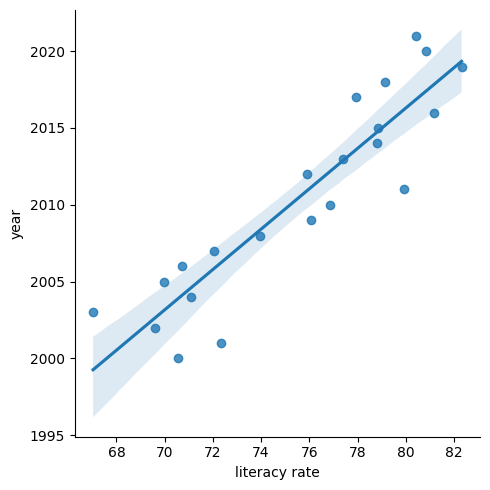

In [56]:
to_plot = df_melt.groupby('year')['literacy rate'].mean()
to_plot = pd.DataFrame(to_plot).reset_index()
to_plot = to_plot.astype('float64')

sns.lmplot(x='literacy rate', y='year' , data=to_plot, hue=None)

### Top five countries:

As we sorted the country_means variable earlier, we can use .tail(5) to get the countries with the highest five literacy values.

In [57]:
highest_five = country_means.tail(5) 
highest_five

Country Name               Country Code
Cuba                       CUB             99.769315
Lithuania                  LTU             99.777059
Estonia                    EST             99.849846
Latvia                     LVA             99.858515
Korea, Dem. People's Rep.  PRK             99.997612
Name: literacy rate, dtype: float64

We need to make this a DataFrame as it is currently a Series. <br>
We should also add a column to label that these are the top five countries. <br>
This will make it easier to distinguish between the top and bottom five countries when we join the DataFrames together.

In [58]:
highest_five_df = pd.DataFrame(highest_five)  # transforms the Series into a DataFrame

highest = ["Highest" for i in range(0, (len(highest_five_df)))]  # repeats 'Highest' five times, so we can add it as a column to the DataFrame

highest_five_df["Status"] = highest  # creates a new column

highest_five_df

,,literacy rate,Status
Country Name,Country Code,,
Cuba,CUB,99.769315,Highest
Lithuania,LTU,99.777059,Highest
Estonia,EST,99.849846,Highest
Latvia,LVA,99.858515,Highest
"Korea, Dem. People's Rep.",PRK,99.997612,Highest


### Bottom five countries:

As we sorted the country_means variable earlier, we can use .head(5) to get the countries with the lowest five literacy values.

In [59]:
lowest_five = country_means.head(5) 
lowest_five

Country Name  Country Code
Chad          TCD             15.379128
Afghanistan   AFG             19.809310
Mali          MLI             20.470424
Niger         NER             20.530956
Guinea        GIN             22.271088
Name: literacy rate, dtype: float64

Again, we need to make the lowest_five Series a DataFrame, and add a new column.

In [60]:
lowest_five_df = pd.DataFrame(lowest_five)  # transforms the Series into a DataFrame

lowest = ["Lowest" for i in range(0, (len(highest_five_df)))]  # repeats 'Lowest' five times, so we can add it as a column to the DataFrame

lowest_five_df["Status"] = lowest  # creates a new column

lowest_five_df

,,literacy rate,Status
Country Name,Country Code,,
Chad,TCD,15.379128,Lowest
Afghanistan,AFG,19.809310,Lowest
Mali,MLI,20.470424,Lowest
Niger,NER,20.530956,Lowest
Guinea,GIN,22.271088,Lowest


It appears that the non-countries that we saw earlier don't appear in the highest or lowest five literacy rates. <br>
Therefore, we do not need to remove them as they have no impact.

We can now join together the two DataFrames. <br>
We can use pandas.concat for this. <br>

In [61]:
frames = [highest_five_df, lowest_five_df] # make a single variable with the two DataFrames that we want to join together

concatenated = pd.concat(frames) 

concatenated

,,literacy rate,Status
Country Name,Country Code,,
Cuba,CUB,99.769315,Highest
Lithuania,LTU,99.777059,Highest
Estonia,EST,99.849846,Highest
Latvia,LVA,99.858515,Highest
"Korea, Dem. People's Rep.",PRK,99.997612,Highest
Chad,TCD,15.379128,Lowest
Afghanistan,AFG,19.809310,Lowest
Mali,MLI,20.470424,Lowest
Niger,NER,20.530956,Lowest


The 'Country Name' and 'Country Code' columns are not recognised:

In [62]:
concatenated.columns

Index(['literacy rate', 'Status'], dtype='object')

Therefore, we need to use reset_index():

In [63]:
concatenated = concatenated.reset_index()
concatenated

,Country Name,Country Code,literacy rate,Status
0,Cuba,CUB,99.769315,Highest
1,Lithuania,LTU,99.777059,Highest
2,Estonia,EST,99.849846,Highest
3,Latvia,LVA,99.858515,Highest
4,"Korea, Dem. People's Rep.",PRK,99.997612,Highest
5,Chad,TCD,15.379128,Lowest
6,Afghanistan,AFG,19.809310,Lowest
7,Mali,MLI,20.470424,Lowest
8,Niger,NER,20.530956,Lowest
9,Guinea,GIN,22.271088,Lowest


In [64]:
concatenated.columns

Index(['Country Name', 'Country Code', 'literacy rate', 'Status'], dtype='object')

From the output above, we can see that the columns are recognised now.

Let's tidy up our final DataFrame:
* Re-order the columns so that literacy rate is the right-most column
* Rename 'literacy rate' to 'Mean Female Literacy Rate (%)'
* Re-order literacy rate values to ascending 

In [65]:
final_df = concatenated[["Country Name", "Country Code", "Status", "literacy rate"]].sort_values(by="literacy rate", ascending = True)\
  .rename(columns={"literacy rate": "Mean Adult Female Literacy Rate (%)"})

final_df

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%)
5,Chad,TCD,Lowest,15.379128
6,Afghanistan,AFG,Lowest,19.809310
7,Mali,MLI,Lowest,20.470424
8,Niger,NER,Lowest,20.530956
9,Guinea,GIN,Lowest,22.271088
0,Cuba,CUB,Highest,99.769315
1,Lithuania,LTU,Highest,99.777059
2,Estonia,EST,Highest,99.849846
3,Latvia,LVA,Highest,99.858515
4,"Korea, Dem. People's Rep.",PRK,Highest,99.997612


## Visualising the Clean Data

We wanted to plot our top five and bottom five countries to see the different between the highest and lowest mean female literacy rates:

<Axes: xlabel='Country Code', ylabel='Mean Adult Female Literacy Rate (%)'>

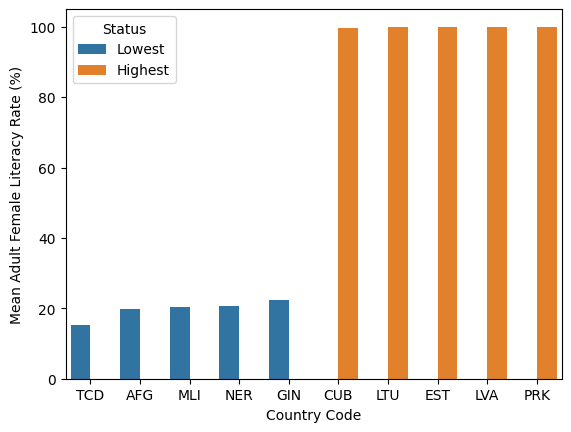

In [66]:
sns.barplot(data=final_df, x="Country Code", y="Mean Adult Female Literacy Rate (%)", hue="Status")

We want to split our graph into two subplots:
1) Countries with the lowest adult female literacy rates
2) Countries with the highest adult female literacy rates

First import matplotlib:

In [67]:
from matplotlib import pyplot as plt

We want to use the country codes along the x-axis to make the plot look neater. <br>
However, we also want to be able to easily tell what the corresponding country is for each country code.<br>
Below we use a loop to create a variable that shows the country code for each country to add to the graph:

In [68]:
code_to_name = ""
index = 0
for row in range(0,len(final_df["Country Code"])):
    code_to_name += f"{final_df['Country Code'][index]}: {final_df['Country Name'][index]}\n"
    index += 1
print(code_to_name) # need to use print commans, otherwise it'll put everything on one line

CUB: Cuba
LTU: Lithuania
EST: Estonia
LVA: Latvia
PRK: Korea, Dem. People's Rep.
TCD: Chad
AFG: Afghanistan
MLI: Mali
NER: Niger
GIN: Guinea



We put the top and bottom countries into their own variable, so we can make two seperate plots. <br>
Then we plotted both bar charts next to each other using plt.subplot(). <br>
We also added our text variable to show the corresponding country name for each country code. 

Text(0.92, 0.5, "CUB: Cuba\nLTU: Lithuania\nEST: Estonia\nLVA: Latvia\nPRK: Korea, Dem. People's Rep.\nTCD: Chad\nAFG: Afghanistan\nMLI: Mali\nNER: Niger\nGIN: Guinea\n")

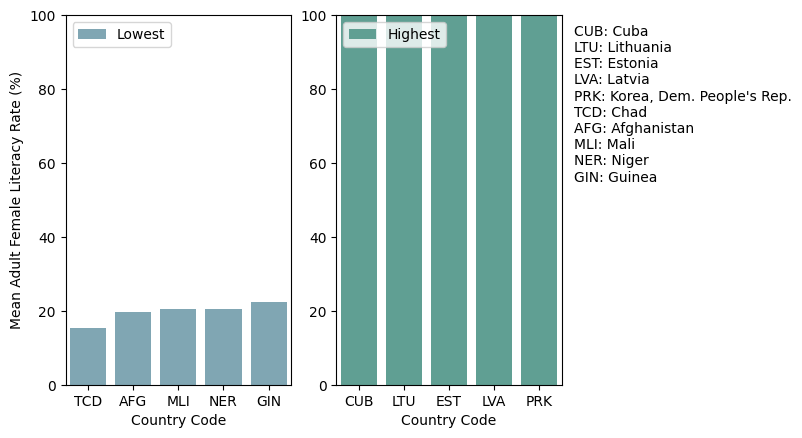

In [69]:
bottom = final_df[final_df["Status"]=="Lowest"] # bottom five
top = final_df[final_df["Status"]=="Highest"] # top five

plt.subplot(1,2,1) # make a plot with one row and two columns - the first graph is below:
sns.barplot(data=bottom, x="Country Code", y="Mean Adult Female Literacy Rate (%)",  color='#7AB', label="Lowest") # label gets added to the legend box
plt.ylim(0, 100) # manipulate the length of the y-axis
plt.legend(loc="upper left") # re-locate the legend box
plt.subplot(1,2,2) # the second graph is below:
sns.barplot(data=top, x="Country Code", y="Mean Adult Female Literacy Rate (%)", color='#5A9', label="Highest")
plt.ylim(0, 100)
plt.ylabel('') # remove the y-label for the second graph
plt.legend(loc = "upper left")
plt.gcf().text(0.92, 0.5, code_to_name, fontsize=10) # add our text variable to the figure - the numbers are the figure coordinates (where to place the text). 

## Saving the Clean Dataset

Write the DataFrame to csv:

In [70]:
final_df.to_csv("clean_female_literacy.csv", index=False) # need index=False otherwise we get an unnamed column when we re-read it in

Read it back in to check that it works properly:

In [71]:
test = pd.read_csv("clean_female_literacy.csv")
test

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%)
0,Chad,TCD,Lowest,15.379128
1,Afghanistan,AFG,Lowest,19.809310
2,Mali,MLI,Lowest,20.470424
3,Niger,NER,Lowest,20.530956
4,Guinea,GIN,Lowest,22.271088
5,Cuba,CUB,Highest,99.769315
6,Lithuania,LTU,Highest,99.777059
7,Estonia,EST,Highest,99.849846
8,Latvia,LVA,Highest,99.858515
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612
